# Calculating and Analyzing CLV

## Importing standard packages:

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

## Reading in the original data, and joining with the churn and margin predicted values:

In [2]:
combined_df = pd.read_csv(r'C:\Users\priya\combined_data.csv')
churn_df = pd.read_csv(r'C:\Users\priya\churn_scores.csv')
margin_df = pd.read_csv(r'C:\Users\priya\margin_scores.csv')

combined_df = pd.merge(combined_df, churn_df, on='acct_ID', how='left')
combined_df = pd.merge(combined_df, margin_df, on='acct_ID', how='left')

# it should be noted that Python is case sensitive for variable names.  acct_id above would fail.

combined_df.shape

(73384, 113)

## Since our margin model had transformed the target variable, we need to untransform the predicted value,
##     using the inverse of our transformation:

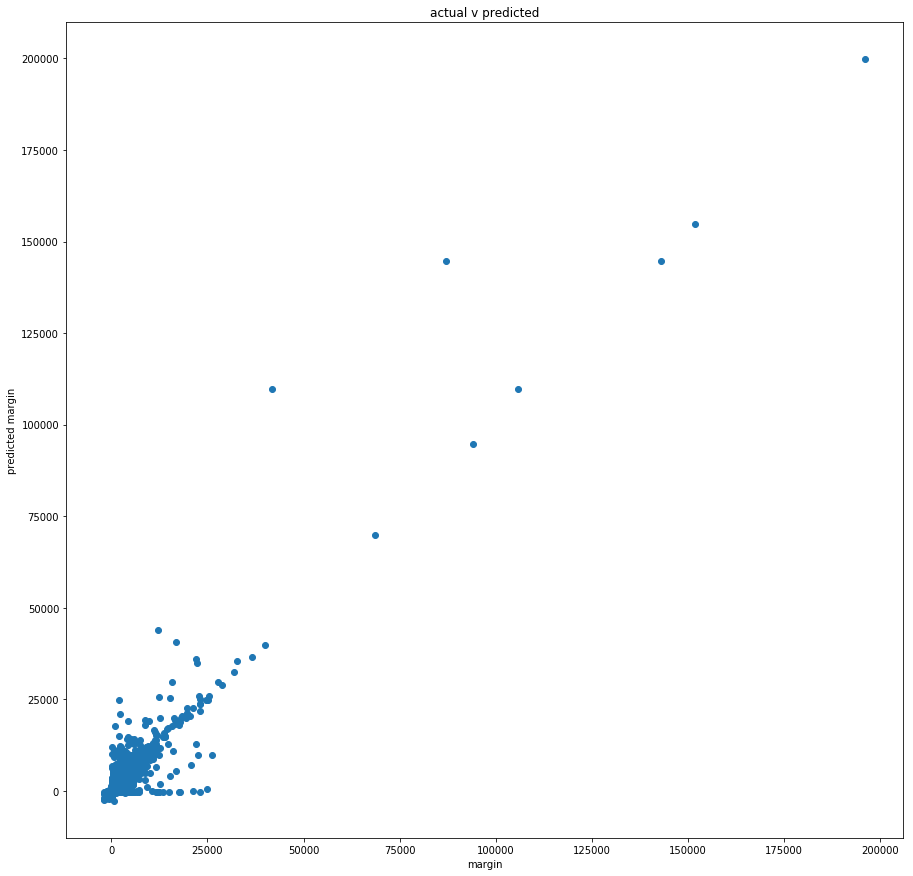

In [3]:
combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000

# Plotting predicted untransformed values vs actual untransformed values:

plt.figure(figsize=(15,15))
plt.scatter(combined_df['P_margin_Y_pos_1'], combined_df['margin_Y_pos_1'])
plt.xlabel("margin")
plt.ylabel("predicted margin")
plt.title("actual v predicted")
# plt.xticks([])
# plt.yticks([])
print(" ") 
plt.show()

# It should be noted:  we are scoring our original data, used for modeling, only for the purposes of analysis.
##  In a "real world" situation, we would most likely be scoring a full population for which we did not actually
##  know the future churn or the future margin.

## We are using a simplified CLV formula, in which we:
###    *  are predicting only annual numbers,
###    *  are assuming that next year's annual prediction are the same values for the next 3 years,
###    *  that our future value is adequately estimated using only 3 future years.

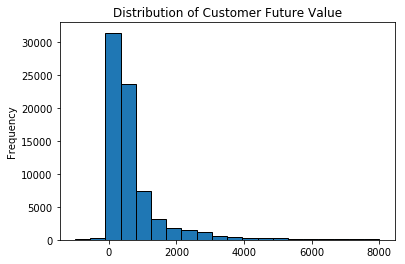

,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,...,tier_prev_1-Bronze,tier_prev_2-Silver,tier_prev_3-Gold,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV
count,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,...,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000,73384.000000
mean,0.517770,0.891557,0.963752,0.091914,0.264772,2.905211,65.336095,4.852797,19.053009,7.764976,...,0.210836,0.064033,0.032800,0.010983,0.006050,0.675297,0.262113,4.702395,408.484378,813.239191
std,0.499688,0.310942,0.186907,0.288906,0.441215,3.098224,58.062449,9.954875,14.810633,45.585219,...,0.407905,0.244813,0.178114,0.104225,0.077549,0.468267,0.317468,0.008638,1532.674908,2911.744345
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003755,4.682610,-1848.439360,-4467.673410
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,14.000000,1.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013837,4.700163,137.540319,94.622759
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,46.000000,1.210000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.096758,4.700639,192.477465,407.181347
75%,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,109.000000,2.560000,33.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.506219,4.702313,386.330552,787.939760
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,298.000000,165.000000,428.000000,2322.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.952445,5.390966,196017.627466,324138.525887


In [4]:
annual_discount_rate = 0.10
combined_df['CFV'] = (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)
plothist = combined_df['CFV'].plot.hist(title="Distribution of Customer Future Value",bins=20, range=(-1000,8000),edgecolor='black')
plt.show()
combined_df.describe()

## Establishing the quadrants for high/low churn and margin

In [5]:
print("mean churn: ",  np.median(combined_df['P_churn_year_plus1_ind']))
print("median margin: %d" % (np.median(combined_df['P_margin_Y_pos_1'])))

# initializing to values which should not occur after logic below.
combined_df['retention_grp'] = '0X'
combined_df['margin_grp'] = '0X'
combined_df['quadrant_retention_margin'] = 'error_error'

combined_df.loc[combined_df['P_churn_year_plus1_ind']<np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="2H"
combined_df.loc[combined_df['P_churn_year_plus1_ind']>=np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="1L"

combined_df.loc[(combined_df['P_margin_Y_pos_1']<np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']>=np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="2H"

combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "1L_1L"
combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "1L_2H"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "2H_1L"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "2H_2H"

mean churn:  0.09675797263009742
median margin: 192


## Output scored data and go to Tableau for more analysis...

In [6]:
combined_df.to_csv(r'C:\Users\priya\CLV_scores.csv',index=False)